In [25]:
from keras.datasets import mnist
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd

In [26]:
train_df = pd.read_csv('C:/Users/Богдан/Downloads/lab 5/mnist_train.csv',header=None)
test_df = pd.read_csv('C:/Users/Богдан/Downloads/lab 5/mnist_test.csv',header=None)
x_train = train_df.drop(0,axis=1).values
x_train = x_train/255
y_train = train_df[0].values

x_test = test_df.drop(0,axis=1).values
x_test = x_test/255
y_test = test_df[0].values

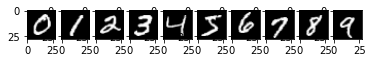

In [27]:
train_filter = np.unique(y_train, return_index=True)
X_train, Y_train = x_train[train_filter[1:]], y_train[train_filter[1:]]

fig, axs = plt.subplots(1, 10)
k = 0
for i in range(10):
    axs[i].imshow(X_train[k].reshape(28,28), cmap = 'gray')
    k+=1
plt.show()

[3 9 2 7 4 8 9 9 8 4 3 3 1 1 8 1 1 3 2 4 4 3 9 3 0 0 1 8 0 7 1 8 2 4 3 9 3
 0 1 4 8 0 8 8 7 6 3 1 3 0 1 1 9 1 1 7 6 5 9 9 7 6 9 7 6 4 1 8 0 7 0 2 9 9
 0 3 8 3 8 8 8 2 4 6 1 9 4 4 9 3 9 2 2 0 8 0 2 9 8 7]


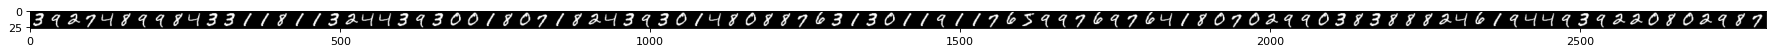

----------------
[9 3 7 3 7 0 7 1 1 7 7 1 1 9 2 3 9 1 8 5 6 5 4 5 4 3 9 5 6 1 6 1 1 7 7 9 8
 2 9 6 8 3 5 6 9 2 6 5 4 9 7 6 8 6 8 7 9 7 2 2 8 4 7 3 0 9 1 4 7 8 7 6 2 2
 5 7 0 4 0 6 1 9 6 4 7 3 4 5 8 1 7 2 3 6 5 1 9 2 4 6]


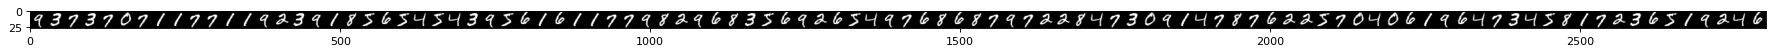

----------------
[1 1 5 5 8 1 7 8 7 4 1 6 8 1 3 4 1 5 6 4 8 8 3 9 7 6 2 9 9 4 8 9 6 5 6 3 8
 9 4 7 3 8 2 8 6 1 2 3 5 8 4 9 2 4 8 8 6 8 8 0 8 8 4 6 5 4 2 1 8 5 5 1 1 7
 7 2 6 5 6 2 6 9 7 6 2 9 1 5 2 7 4 8 9 5 2 3 7 2 6 0]


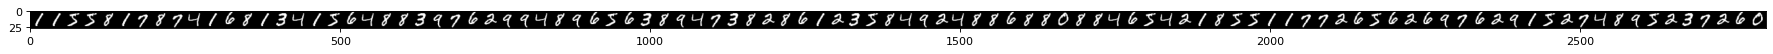

----------------


In [28]:
ints_list = np.random.randint(0, 10, 100)

text_number = []
text_images = []

for _ in range(110):
    string_number = np.random.randint(0, 10, 100)
    string_image = X_train[string_number].reshape(100,1,28*28)
    text_number.append(string_number)
    text_images.append(string_image)
        
targets = np.array(text_number)
images = np.array(text_images)

for i in [10, 50, 100]:
        print(targets[i])
        figure(figsize=(28, 22), dpi=80)
        plt.imshow(np.concatenate(images[i].reshape(100,28,28),axis = 1),cmap = 'gray')
        plt.show()
        print("----------------")

[3 9 2 7 4 8 9 9 8 4 3 3 1 1 8 1 1 3 2 4 4 3 9 3 0 0 1 8 0 7 1 8 2 4 3 9 3
 0 1 4 8 0 8 8 7 6 3 1 3 0 1 1 9 1 1 7 6 5 9 9 7 6 9 7 6 4 1 8 0 7 0 2 9 9
 0 3 8 3 8 8 8 2 4 6 1 9 4 4 9 3 9 2 2 0 8 0 2 9 8 7]


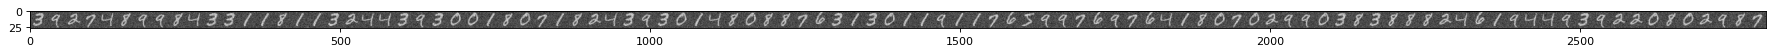

----------------
[9 3 7 3 7 0 7 1 1 7 7 1 1 9 2 3 9 1 8 5 6 5 4 5 4 3 9 5 6 1 6 1 1 7 7 9 8
 2 9 6 8 3 5 6 9 2 6 5 4 9 7 6 8 6 8 7 9 7 2 2 8 4 7 3 0 9 1 4 7 8 7 6 2 2
 5 7 0 4 0 6 1 9 6 4 7 3 4 5 8 1 7 2 3 6 5 1 9 2 4 6]


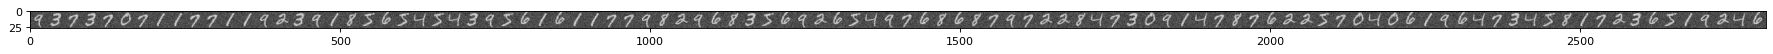

----------------
[1 1 5 5 8 1 7 8 7 4 1 6 8 1 3 4 1 5 6 4 8 8 3 9 7 6 2 9 9 4 8 9 6 5 6 3 8
 9 4 7 3 8 2 8 6 1 2 3 5 8 4 9 2 4 8 8 6 8 8 0 8 8 4 6 5 4 2 1 8 5 5 1 1 7
 7 2 6 5 6 2 6 9 7 6 2 9 1 5 2 7 4 8 9 5 2 3 7 2 6 0]


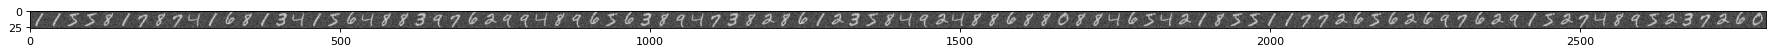

----------------


In [31]:
import numpy as np
import os
import cv2
def noisy(noise_typ,image):
    if noise_typ == "gauss":
      row, col, ch= image.shape
      mean = 0
      var = 0.02
      sigma = var**0.5
      gauss = np.random.normal(mean,sigma,(row,col,ch))
      gauss = gauss.reshape(row,col,ch)
      noisy = image + gauss
      return noisy

noise_images = []
for image in images:
    image = noisy("gauss",image)
    noise_images.append(image)

noise_images = np.array(noise_images)
for i in [10, 50, 100]:
        print(targets[i])
        figure(figsize=(28, 22), dpi=80)
        plt.imshow(np.concatenate(noise_images[i].reshape(100,28,28),axis = 1),cmap = 'gray')
        plt.show()
        print("----------------")

0


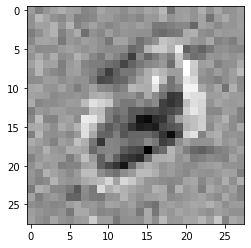

--------------------------------------
1


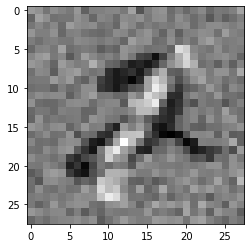

--------------------------------------
2


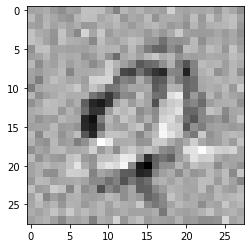

--------------------------------------
3


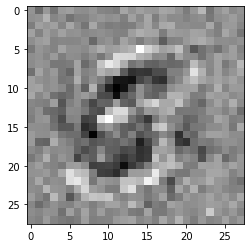

--------------------------------------
4


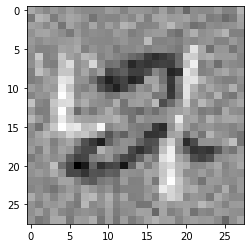

--------------------------------------
5


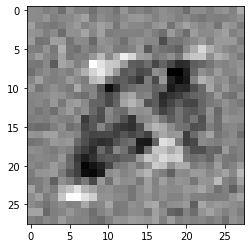

--------------------------------------
6


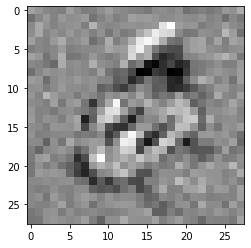

--------------------------------------
7


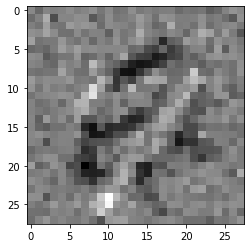

--------------------------------------
8


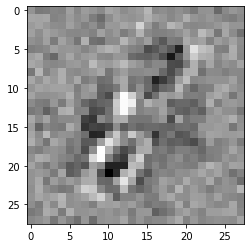

--------------------------------------
9


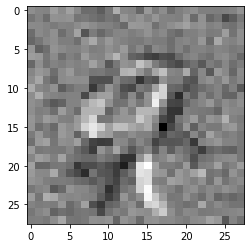

--------------------------------------


In [32]:
def perceptron(x,y,lambd):
    for k in range(len(lambd)):
        encoded_x = np.zeros(x.shape)
        for i in range(x.shape[0]):
            for j in range(x.shape[1]):
                if k == y[i][j]: 
                    encoded_x[i][j] = x[i][j]
                else:
                    encoded_x[i][j] = -x[i][j]

        for i in range(x.shape[0]):
            for j in range(x.shape[1]):
                if np.dot(lambd[k],encoded_x[i][j][0])<=0:  
                    lambd[k]+=encoded_x[i][j][0]
                    lambd = perceptron(x,y,lambd)
    return lambd

train_x, train_y, test_x, test_y = noise_images[:10],targets[:10],noise_images[10:],targets[10:]
lambd = np.zeros((10,28*28))
lambd = perceptron(train_x,train_y,lambd)
for i in range(lambd.shape[0]):
    print(i)
    lambd_kernel = lambd[i].reshape(28,28)
    plt.imshow(lambd_kernel,cmap = 'gray')
    plt.show()
    print("--------------------------------------")

In [34]:
predicts = []
targets = []
for i in range(test_x.shape[0]):
    for j in range(test_x.shape[1]):
        target = test_y[i][j]
        targets.append(target)
        predict = np.zeros(10)
        for z in range(10):
            predict[z] = np.dot(lambd[z],test_x[i][j][0])
        predict = np.argmax(predict)
        predicts.append(predict)
        if predict!=target:
            print('Target = ',target, "Predicted = ",predict)
            plt.imshow(test_x[i][j][0].reshape(28,28),cmap = 'gray')
            plt.show()
            print('--------------------------------------------------------')

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(targets,predicts)

1.0